<a href="https://colab.research.google.com/github/fmathews11/disc_golf/blob/main/Disc_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, re

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/fmathews11/disc_golf/main/pdga-approved-disc-golf-discs_2022-05-10T08-43-04.csv')
df = df.drop([df.columns[i] for i in (2,11,12,13,14,15)],axis = 1)

is_all_alpha = lambda x: all(i.isalpha() for i in x)

col_list = []
for i in df.columns.tolist():
  col = i.split()
  final_string = ''
  for j in col:
    if is_all_alpha(j):
      final_string += j + "_"
  col_list.append(final_string[:-1].lower())

df.columns = col_list
df.sample(5)

,manufacturer_distributor,disc_model,diameter,height,rim_depth,inside_rim_diameter,rim_thickness,rim_depth_diameter_ratio,rim_configuration,flexibility
1050,Discmania,"TD (Rush, Turn Driver)",21.2,1.6,1.1,17.3,1.9,5.2,27.50,8.05
1269,Discraft,Wildcat,21.3,1.5,1.2,17.5,1.9,5.6,27.25,10.21
1074,Innova Champion Discs,Dart,21.2,2.2,1.4,18.8,1.2,6.6,38.00,5.10
564,Innova Champion Discs,Firestorm,21.1,1.5,1.1,16.5,2.3,5.2,27.50,10.77
1081,Innova Champion Discs,Groove,21.1,1.7,1.2,16.3,2.4,5.7,28.00,10.21


In [36]:
df = df.dropna()

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df.iloc[:,2:].to_numpy())
print(f"Explained Variance After PCA: {np.sum(pca.explained_variance_ratio_)}")
df_pca = pca.transform(df.iloc[:,2:].to_numpy())
df_pca

Explained Variance After PCA: 0.9944108052729934


array([[11.89825266,  0.68539292],
       [11.92464518,  1.14259482],
       [-0.50412807,  1.85139236],
       ...,
       [37.87247715,  4.24038088],
       [42.33384636,  2.71894491],
       [47.3062027 ,  2.97229847]])

In [49]:
grab_numpy_column = lambda array,col_number: [i[col_number] for i in array]

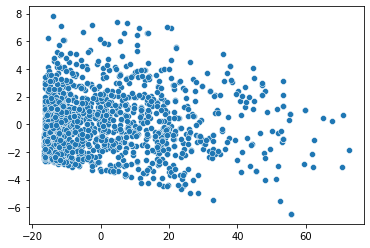

In [50]:
df_pca = pca.transform(df.iloc[:,2:].to_numpy())
sns.scatterplot(data = df_pca,
                x = grab_numpy_column(df_pca,0),
                y = grab_numpy_column(df_pca,1))

In [46]:
pd.DataFrame(df_pca)

,0,1
0,11.898253,0.685393
1,11.924645,1.142595
2,-0.504128,1.851392
3,-7.488186,3.481469
4,24.380516,-3.530550
...,...,...
1501,53.221317,1.306554
1502,44.518391,4.104746
1503,37.872477,4.240381
1504,42.333846,2.718945
